<a href="https://colab.research.google.com/github/Nir77/ANALYSING-THE-FACTORS-THAT-INFLUENCE-HUMAN-INEQUALITY-AND-POVERTY/blob/main/Code_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [14]:
def findcrossings(signal):
    crossings = np.where(np.diff(np.signbit(signal)))[0]
    return crossings + 1

In [15]:
def findpeak(signal, crossings, signal_1):
    peaks = []
    peak_labels = {'P1': [], 'P2': []}
    for i in range(len(crossings) - 1):
        start, end = crossings[i], crossings[i + 1]
        segment = signal[start:end]
        local_peaks, properties = find_peaks(segment, height=max(segment) * 0.5)
        if local_peaks.size > 0 :
            peak_idx = start + local_peaks[0]
            peak_val = segment.iloc[local_peaks[0]]
            if signal_1.iloc[start] > 0:
                peaks.append((peak_idx, peak_val, 'P2', 'red'))
                peak_labels['P2'].append(peak_idx)
            else:
                peaks.append((peak_idx, peak_val, 'P1', 'green'))
                peak_labels['P1'].append(peak_idx)
    return peaks, peak_labels



In [17]:
def plotsignal(filepath):
    data = pd.read_csv(filepath)
    signal_1 = data['signal 1']
    signal_2 = data['signal 2']

    zero_crossings = findcrossings(signal_1)
    peaks, peak_labels = findpeak(signal_2, zero_crossings, signal_1)

    plt.figure(figsize=(14, 7))
    plt.plot(signal_2, label='Signal 2', color='#FF5733', alpha=0.7)
    plt.plot(signal_1, label='Signal 1', color='blue')
    plt.scatter([], [], color='green', label='P1')
    plt.scatter([], [], color='red', label='P2')

    for idx, val, label, color in peaks:
        plt.scatter(idx, val, color=color)

    plt.title('Signal 1 and Signal 2 with P1 and P2 Points Marked')
    plt.xlabel('Index')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.savefig('signals_with_points.png')  # Save the figure to a file
    plt.show()

    print("P1 indices:", peak_labels['P1'])
    print("P2 indices:", peak_labels['P2'])

    return peak_labels['P1'], peak_labels['P2']

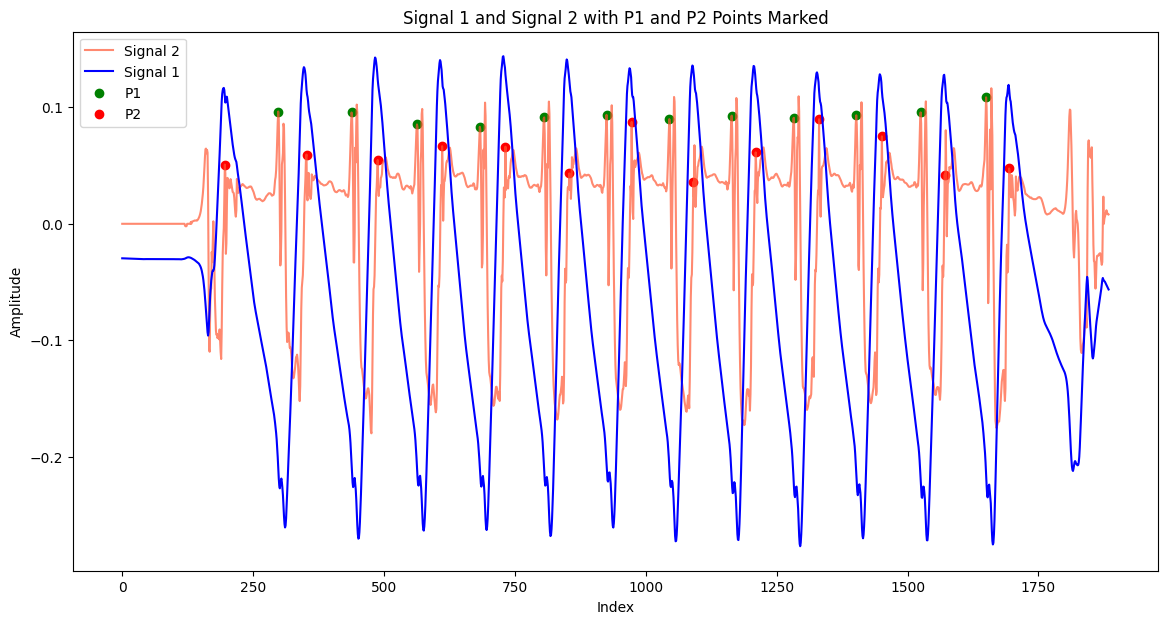

P1 indices: [298, 438, 563, 683, 806, 925, 1045, 1164, 1283, 1402, 1525, 1650]
P2 indices: [196, 352, 488, 611, 732, 854, 973, 1091, 1210, 1331, 1451, 1571, 1694]


In [18]:
p1indices,p2indices = plotsignal('input_file.csv')